## Lab 6: Introduction to scatter plots and the Gutenberg-Richter Relation

This lesson will introduce scatter plots and how to make them in several different ways. We will start by importing the ANSS earthquake catalog which you can optionally download [here](http://www.ncedc.org/anss/catalog-search.html). OR, for your convenience this file is also provided in the "data" folder within the LAB6 folder.

The catalog provided is for magnitude >= 5 events occurring between 1997 and 2009 worldwide. For easy import, it is best to download a CSV version.

For additional details see the publication:
John M. Aiken, Chastity Aiken, Fabrice Cotton; A Python Library for Teaching Computation to Seismology Students. Seismological Research Letters ; 89 (3): 1165–1171. doi: https://doi.org/10.1785/0220170246

Here we will import the familiar toolkit `pandas` that we used in Lab 4 to import data from Oregon State University volcano database.  As well as the plotting library we have used before `matplotlib`.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

The next cell will read the csv data from the data folder previously downloaded for you. Then the following cell will display the first 5 lines (head) of the table from the .csv file.

In [2]:
# read the data, set space delimiter, and get rid of the dash line in 1st line after header
df = pd.read_csv('data/anss.csv', delim_whitespace=True, skiprows=[1])

In [3]:
df.head()

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event,ID
0,1997/01/01,04:35:51.88,6.813,-72.894,163.7,5.3,Mw,150,1.10,NEI,1.997010e+11,NaN,NaN,NaN
1,1997/01/01,22:32:32.30,-0.127,123.823,115.4,5.8,Me,178,1.01,NEI,1.997010e+11,NaN,NaN,NaN
2,1997/01/01,22:43:32.31,-5.977,129.665,177.0,5.0,Mb,31,0.77,NEI,1.997010e+11,NaN,NaN,NaN
3,1997/01/02,02:57:51.65,-23.860,-179.870,500.0,5.4,Mw,107,0.91,NEI,1.997010e+11,NaN,NaN,NaN
4,1997/01/02,10:52:35.03,10.568,92.742,33.0,5.1,Mb,117,0.95,NEI,1.997010e+11,NaN,NaN,NaN


What are these columns?

Some are self explanatory but some are not:

* MagT - magnitude type, the way the magnitude was calculated
* Nst - the number of stations used to locate the earthquake
* Gap - azimuthal gap of stations used to locate the earthquake
* RMS - root mean square error for the location
* SRC - network organization that reported the event
* EventID - ID number assigned to the event


In [4]:
df.describe()

,Lat,Lon,Depth,Mag,Nst,RMS,Event,ID
count,12835.000000,12835.000000,12835.000000,12835.000000,12835.000000,1.274000e+04,2.400000e+01,0.0
mean,2.457569,45.992318,62.271610,5.411432,153.968991,1.992723e+11,1.136930e+07,NaN
std,28.948117,119.242131,105.848819,0.425692,123.620500,1.324377e+10,1.205323e+07,NaN
min,-65.736000,-179.994000,-5.000000,5.000000,0.000000,4.000000e-02,1.129580e+05,NaN
25%,-17.171000,-70.130000,10.000000,5.100000,63.000000,1.999100e+11,1.184708e+06,NaN
50%,-1.549000,97.239000,33.000000,5.300000,116.000000,2.002011e+11,5.370876e+06,NaN
75%,23.772000,142.433000,50.200000,5.600000,207.000000,2.004052e+11,2.125422e+07,NaN
max,86.283000,179.993000,691.600000,9.000000,929.000000,2.006031e+11,3.022827e+07,NaN


Scatter plots are used to look at how two variables compare. For example, does the magnitude of the earthquake correlate in some way to the number of stations used to locate it?


### Exercise 1:  Make a plot of Magnitude vs. Number of stations

We got it started for you here, but you need to fill in the brackets to actually make a scatter plot for the magnitude (x-axis) and number of stations (y-axis)

<AxesSubplot:>

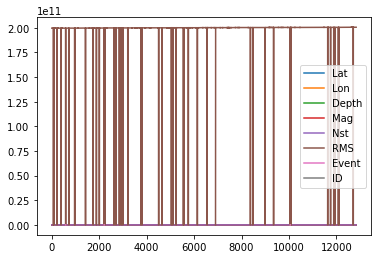

In [5]:
df.plot()

We can clean this plot up a lot though. Lets start by looking at the machinery that creates it.

Text(0.5, 0, 'Magnitude')

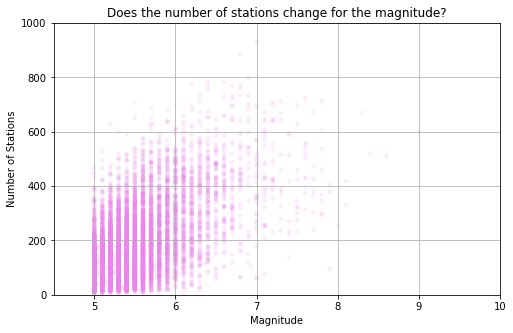

In [6]:
fig, ax = plt.subplots(1, figsize=(8,5))

df.plot(ax=ax, kind='scatter', x='Mag', y='Nst', alpha=0.15, edgecolor='None'
       ,color='violet')

ax.set_ylim(0, 1000)
ax.set_xlim(4.5, 10)
ax.grid(True)
ax.set_title('Does the number of stations change for the magnitude?')

ax.set_ylabel('Number of Stations')
ax.set_xlabel('Magnitude')

### Exercise 2: Make Gutenberg-Richter plots

In seismology, the Gutenberg–Richter law expresses the relationship between the magnitude and total number of earthquakes (that is the distribution) in any given region and time period of at least that magnitude.

$log_{10}N = a -bM$

or

$N = 10^{a-bM}$

Where:

* $N$  is the number of events having a magnitude, $\geq M$ 
* $a$  and $b$  are constants.

To create the Gutenberg-Richter distribution of the earthquake magnitudes from the ANSS catalog (aka the .cvs file!) we imported above, we are going to use the familar toolkit `numpy`.

In [7]:
# Try importing here


In [8]:
df.Mag.values.round(1)

array([5.3, 5.8, 5. , ..., 5.1, 5.1, 5.1])

In [9]:
import numpy as np

hist, edges = np.histogram(a=df.Mag.values.round(1), bins=101, range=(0,10))
#cummulative histogram
chist = np.cumsum(hist[::-1])[::-1]

Look at what the variable "edges" is

In [10]:
edges

array([ 0.        ,  0.0990099 ,  0.1980198 ,  0.2970297 ,  0.3960396 ,
        0.4950495 ,  0.59405941,  0.69306931,  0.79207921,  0.89108911,
        0.99009901,  1.08910891,  1.18811881,  1.28712871,  1.38613861,
        1.48514851,  1.58415842,  1.68316832,  1.78217822,  1.88118812,
        1.98019802,  2.07920792,  2.17821782,  2.27722772,  2.37623762,
        2.47524752,  2.57425743,  2.67326733,  2.77227723,  2.87128713,
        2.97029703,  3.06930693,  3.16831683,  3.26732673,  3.36633663,
        3.46534653,  3.56435644,  3.66336634,  3.76237624,  3.86138614,
        3.96039604,  4.05940594,  4.15841584,  4.25742574,  4.35643564,
        4.45544554,  4.55445545,  4.65346535,  4.75247525,  4.85148515,
        4.95049505,  5.04950495,  5.14851485,  5.24752475,  5.34653465,
        5.44554455,  5.54455446,  5.64356436,  5.74257426,  5.84158416,
        5.94059406,  6.03960396,  6.13861386,  6.23762376,  6.33663366,
        6.43564356,  6.53465347,  6.63366337,  6.73267327,  6.83

Look at what 'hist' is

In [11]:
hist

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2067, 1896, 1817, 1408, 1313,
        938,  737,  559,  411,  372,  283,  213,  169,  138,  114,   79,
         71,   49,   40,   23,   29,   26,   18,   11,    8,   10,   11,
          7,    8,    3,    1,    2,    0,    1,    1,    0,    1,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

#### We got you started but you need to plot the data ...

Text(0.5, 1.0, 'Gutenberg-Richter Distribution')

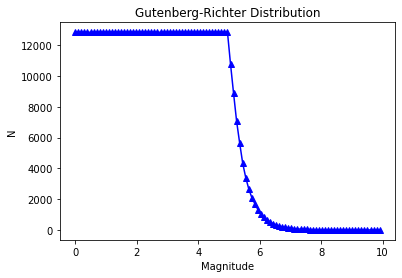

In [12]:
fig, ax = plt.subplots()

#try plotting the data ('edges' variable here)
ax.plot(edges[:-1], chist, marker='^', color='blue')

ax.set_ylabel('N')
ax.set_xlabel('Magnitude')
ax.set_title('Gutenberg-Richter Distribution')

We quite frequently want to plot the fit of the <i>a</i> and <i>b</i> values of the Gutenberg-Richter distribution. To do this, we are going to use the equation below which calculates the maximum likelihood of the distribution and returns the parameters:

* <i>a</i> - the "productivity" of the distribution, but really just the y-intercept
* <i>b</i> - the "mean magnitude" but really it's just the slope
* <i>bstdev</i> - the standard deviation of <i>b</i>
* <i>length</i> - the number of earthquakes used to calculate the values

In [13]:
def fmd_values(magnitudes, bin_width=0.1):
    """
    params magnitudes : numpy.array
    params bin_width : float
    
    returns a,b,bstd, n-values if above the earthquake count threshold
    else returns np.nans
    """
    length = magnitudes.shape[0]
    minimum = magnitudes.min()
    average = magnitudes.mean()
    b_value = (1 / (average - (minimum - (bin_width/2)))) * np.log10(np.exp(1))
    square_every_value = np.vectorize(lambda x: x**2)
    b_stddev = square_every_value((magnitudes - average).sum()) / (length * (length - 1))
    b_stddev = 2.3 * np.sqrt(b_stddev) * b_value**2
    a_value = np.log10(length) + b_value * minimum
    
    return a_value, b_value, b_stddev, length

In [14]:
fmd_values(df.Mag.values)

(8.814338041852478, 0.9411884337690031, 8.527349128951242e-16, 12835)

In [15]:
a, b, bstd, n = fmd_values(df.Mag.values)

Now that we have our values that represent the y-intercept (<i>a</i> value) and the slope (<i>b</i> value). 

### Exercise 3:  You need to  plot a fitted line to the data.  Remember the equation for Gutenberg-Richter ...

We've started it for you, but you need to work through the calcuations ... in particular defining 'y' and actually making the plot.

In [16]:
x = np.linspace(0,10, 1000)
y =

SyntaxError: invalid syntax (<ipython-input-16-94f69fb088ab>, line 2)

NameError: name 'x' is not defined

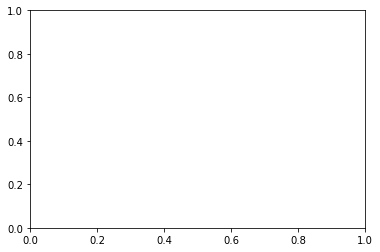

In [17]:
fig, ax = plt.subplots()

ax.plot(x,y)

ax.set_yscale('log')
ax.set_ylabel('N')
ax.set_xlabel('Magnitude')
ax.set_xlim(4.5, 10)
ax.set_ylim(1e0, 1e5)
ax.set_title('Gutenberg-Richter Distribution')

This fit looks pretty good! I hope!